# VISUAL TRANSFORMER TRAINING

### Imports

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, RandomSampler
import torch.optim as optim

import os
os.chdir("..")

from utils.vit import ViTClassifier, PneumoniaDataset
from utils.vit_utils import VitUtilities

### Define The Model

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTClassifier(num_classes=3).to(device)

print("ViT Classifier Initialized!")

ViT Classifier Initialized!


### Define Dataset

In [3]:
CLASS_NAMES = {"pneumonia": 0, "unsure": 1, "normal": 2}

train_dir = "data/clsif/train"
val_dir = "data/clsif/val"
# train_dir = "/content/drive/MyDrive/pneumonia_data/data/clsif/train"
# val_dir = "/content/drive/MyDrive/pneumonia_data/data/clsif/val"

train_dataset = PneumoniaDataset(train_dir, CLASS_NAMES)
val_dataset = PneumoniaDataset(val_dir, CLASS_NAMES)

print(f"Training Samples: {len(train_dataset)}, Validation Samples: {len(val_dataset)}")

Training Samples: 21340, Validation Samples: 5336


### Define DataLoaders

In [4]:
train_loader = DataLoader(train_dataset, batch_size=8, sampler=RandomSampler(train_dataset), num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4, pin_memory=True)

print(f"DataLoaders Created Successfully")

DataLoaders Created Successfully


### Load The Model (optional)

In [5]:
model.load_state_dict(torch.load("vit_pneumonia_classifier_best.pth", map_location=torch.device('cpu')))
model.to(device)  
model.train()

ViTClassifier(
  (vit): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')


### Define Criterion

In [6]:
criterion = nn.CrossEntropyLoss()

### Define Optimizer

In [7]:
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

### Train The Model

In [8]:
# epochs = 1

# VitUtilities.train_vit(model, train_loader, val_loader, optimizer, criterion, device, epochs)
# torch.save(model.state_dict(), "/content/drive/MyDrive/pneumonia_data/data/vit_pneumonia_classifier_test_nvm.pth")

# print("Model Saved Successfully!")

### Prediction

In [9]:
print(f"Prediction: {VitUtilities.predict_vit(model, r'data\clsif\train\unsure\0a35c2fa-9f9e-4157-8deb-8e5d9e69dbc3.png', device)}")

Prediction: Unsure


In [10]:
# optimizer.param_groups[0]['lr']

In [11]:
# VitUtilities.compute_auc(model, val_loader, device)

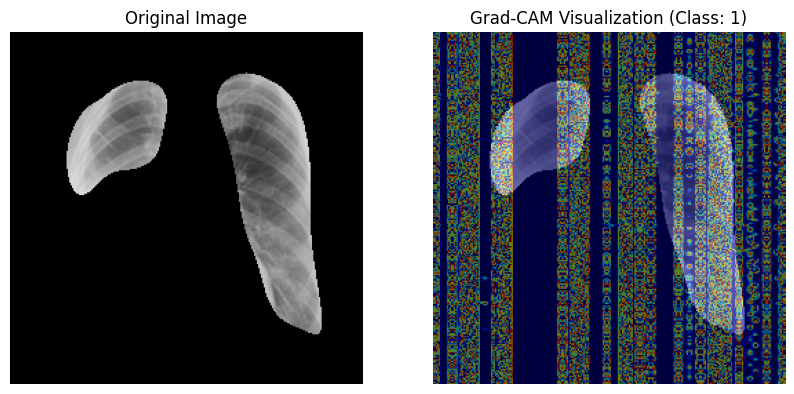

RuntimeError: Can't detach views in-place. Use detach() instead. If you are using DistributedDataParallel (DDP) for training, and gradient_as_bucket_view is set as True, gradients are views of DDP buckets, and hence detach_() cannot be called on these gradients. To fix this error, please refer to the Optimizer.zero_grad() function in torch/optim/optimizer.py as the solution.

In [12]:
VitUtilities.visualize_gradcam(model, r"data\clsif\train\pneumonia\0a51f668-b7b1-4d8d-9ab9-de1f702f071a.png", device)